### Load Dataset

In [16]:
import pandas as pd

# Use read_excel for .xlsx files
dataset = pd.read_excel(r'G:/Python/Shakil/V2/ANN/dataset_1.xlsx').values
# print(dataset, dataset.shape)


In [17]:
data=dataset[:,1:44]
target=dataset[:,0]

# print(data.shape,target.shape)

# Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# # Assuming your target contains string labels like 'Electronics Lab', etc.
# target = ['Electronics Lab', 'Physics Lab', 'Chemistry Lab', 'Electronics Lab']  # Example target

# Convert string labels to integers
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(target)

# Convert integers to one-hot encoded labels
new_target = to_categorical(integer_encoded)

# print("Original target:", target[:10])
# print("Integer encoded target:", integer_encoded[:10])
# print("One-hot encoded target:", new_target)


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [22]:
import numpy as np
train_data = np.asarray(train_data).astype(int)  # or use np.int64 or np.int32 if needed
train_target = np.asarray(train_target).astype(int)  # or use np.int64 or np.int32 if needed
test_data = np.asarray(train_data).astype(int)  # or use np.int64 or np.int32 if needed
test_target = np.asarray(train_target).astype(int)  # or use np.int64 or np.int32 if needed


In [23]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()   # empty sequential type neural network

model.add(Dense(32,input_dim=43,activation='relu'))  # 1st Hidden Layer
model.add(Dense(64,activation='relu')) #2nd Hidden Layer
model.add(Dense(32,activation='relu')) #2nd Hidden Layer
model.add(Dense(5,activation='softmax')) #output layer

model.compile(loss='categorical_crossentropy',optimizer='adaGrad',metrics=['accuracy'])
model.summary()

C:\Users\udaya\miniconda3\envs\sasa\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,765 (22.52 KB)

 Trainable params: 5,765 (22.52 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('models/model-{epoch:03d}.keras', monitor='val_loss', save_best_only=True, mode='auto')


In [25]:
history = model.fit(train_data, train_target, epochs=1000, validation_data=(test_data, test_target), callbacks=[checkpoint])


Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1279 - loss: 1.7894 - val_accuracy: 0.1626 - val_loss: 1.7007
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1945 - loss: 1.6648 - val_accuracy: 0.2358 - val_loss: 1.6054
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2533 - loss: 1.5834 - val_accuracy: 0.3293 - val_loss: 1.5331
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3824 - loss: 1.5136 - val_accuracy: 0.4167 - val_loss: 1.4722
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4265 - loss: 1.4687 - val_accuracy: 0.5142 - val_loss: 1.4187
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5328 - loss: 1.4040 - val_accuracy: 0.5752 - val_loss: 1.3702
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5853 - loss: 1.3679 - val_accuracy: 0.6362 - val_loss: 1.3261
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6599 - loss: 1.3046 - val_accuracy: 0

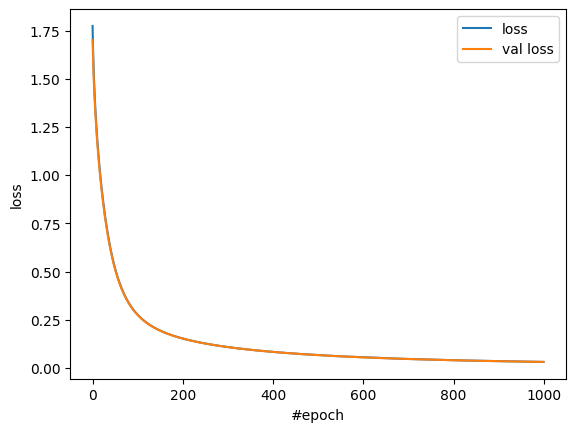

In [26]:
from matplotlib import pyplot as plt

plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('#epoch')
plt.ylabel('loss')
# Save the plot to a file
plt.savefig('loss_plot_cate_cross.png', dpi=600)  # You can change the filename and DPI as needed
# Display the plot
plt.show()

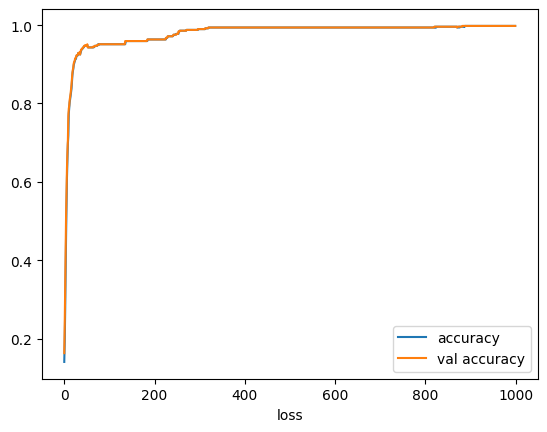

In [27]:
plt.plot(model.history.history['accuracy'],label='accuracy')
plt.plot(model.history.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.xlabel('#epoch')
plt.xlabel('loss')
plt.savefig('acc_plot_cate_cross.png', dpi=600)
plt.show()

In [28]:
predicted_target=model.predict(test_data)
print(predicted_target)
print(np.argmax(predicted_target,axis=1))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[1.5658556e-05 1.8884869e-07 1.1025079e-06 9.9998295e-01 1.9846143e-12]
 [9.9995279e-01 1.4956107e-12 1.2757404e-12 4.7170230e-05 3.0494213e-13]
 [3.4101249e-06 1.0495498e-06 2.3685604e-06 8.1618428e-09 9.9999309e-01]
 ...
 [4.2717933e-05 4.2896212e-05 5.4804896e-05 3.4275919e-07 9.9985921e-01]
 [3.8106896e-03 9.0124011e-01 4.8670541e-03 2.7818652e-03 8.7300323e-02]
 [4.7467300e-05 4.7016096e-05 7.8232137e-05 4.1603647e-07 9.9982697e-01]]
[3 0 4 3 4 4 4 4 1 4 4 4 0 2 0 1 4 0 4 1 0 4 4 2 4 4 0 4 4 4 2 1 4 2 4 3 2
 4 4 3 0 0 4 4 3 4 4 4 4 4 0 1 2 3 4 2 4 3 4 4 4 3 4 4 1 0 2 2 4 0 2 3 2 2
 3 4 1 4 1 3 4 1 1 2 0 3 0 4 0 2 4 3 2 1 4 0 1 0 1 4 4 2 4 3 1 2 3 0 0 0 4
 4 4 2 0 2 0 3 3 3 3 3 1 0 0 1 0 0 2 4 2 2 2 4 4 3 4 4 4 0 0 4 4 3 2 1 0 4
 0 2 3 1 1 1 4 0 4 4 4 4 3 3 1 0 2 1 2 3 4 4 4 2 4 0 4 0 3 1 3 4 3 0 2 4 4
 0 2 0 1 3 0 4 4 3 2 1 4 0 1 0 4 4 4 0 4 1 2 1 0 4 4 1 4 3 0 2 2 1 4 0 3 0
 2 2 2 2 1 3 3 1 2 1 3 4 2 4 1 0 2 3 3 3 4 0 2 0 2 0 0 1 2 4 3 2 0

In [29]:
test_data_1=np.array([0, 0, 4, 0, 8, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]).reshape(1,-1)

predicted_target_1=model.predict(test_data_1)
print(predicted_target_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[9.9998760e-01 2.1314119e-09 8.1732177e-09 1.2410004e-05 4.3835897e-08]]


In [30]:
print(model.evaluate(test_data,test_target))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.9955 - loss: 0.0400
[0.03104749135673046, 0.9979674816131592]


In [ ]:
# Recreate your model architecture first
# For example: model = create_your_model_architecture()

# Load the weights into the model
model.load_weights('model.h5')
print("Weights loaded successfully from model_weights.h5!")
